In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.9MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data_f = data2.loc[data2.team1.isin(['Sunrisers Hyderabad','Mumbai Indians'])] 
data_f = data_f.loc[data_f.team2.isin(['Sunrisers Hyderabad','Mumbai Indians'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
46,47,2017,Hyderabad,2017-05-08,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,Sunrisers Hyderabad,0,7,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,M Erasmus,NaN
422,423,2013,Hyderabad,2013-05-01,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,Sunrisers Hyderabad,0,7,I Sharma,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
443,444,2013,Mumbai,2013-05-13,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,bat,normal,0,Mumbai Indians,0,7,KA Pollard,Wankhede Stadium,AK Chaudhary,SJA Taufel,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN
492,493,2014,Hyderabad,2014-05-12,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,bat,normal,0,Mumbai Indians,0,7,AT Rayudu,"Rajiv Gandhi International Stadium, Uppal",HDPK Dharmasena,VA Kulkarni,NaN
540,541,2015,Mumbai,2015-04-25,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,Mumbai Indians,20,0,SL Malinga,Wankhede Stadium,HDPK Dharmasena,CB Gaffaney,NaN
571,572,2015,Hyderabad,2015-05-17,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,bat,normal,0,Mumbai Indians,0,9,MJ McClenaghan,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,K Srinath,NaN
587,588,2016,Hyderabad,2016-04-18,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,7,DA Warner,"Rajiv Gandhi International Stadium, Uppal",HDPK Dharmasena,VK Sharma,NaN
612,613,2016,Visakhapatnam,2016-05-08,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,85,0,A Nehra,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,S Ravi,C Shamshuddin,NaN


**Let's do Q1 now**

MI Wins - 7
SRH Wins - 7


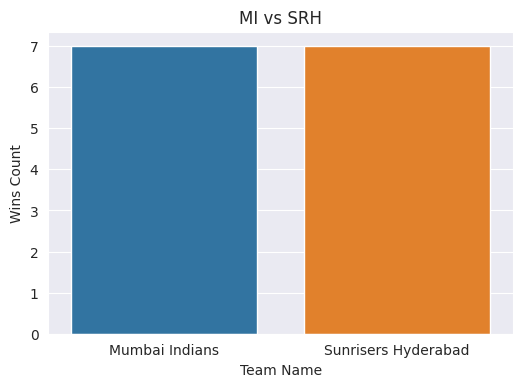

In [12]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('MI vs SRH')
A,B =data_f.winner.value_counts()

print('MI Wins -',A)
print('SRH Wins -',B)

plt.show()


Wooh, Here is a neck to neck fight

Let's find for last season.

In [13]:
data_f = data_f.loc[data_f.season.isin(['2019'])] 

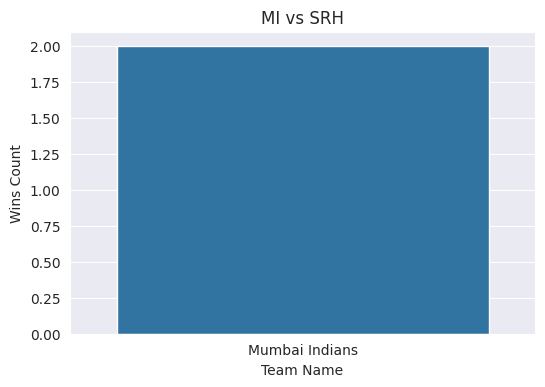

In [14]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('MI vs SRH')

plt.show()

Let's mark MI considering recent performances.

**Let's do Q2 now**

**Let's find Stamina Score for mentioned batsman and  some imp batsman**

In [17]:
data_n = data.loc[data.bowling_team.isin(['Sunrisers Hyderabad','Mumbai Indians'])]
data_n = data_n.loc[data.batting_team.isin(['Sunrisers Hyderabad','Mumbai Indians'])]

In [18]:
data_n.batsman.unique()

array(['S Dhawan', 'DA Warner', 'DJ Hooda', 'Yuvraj Singh', 'BCJ Cutting',
       'NV Ojha', 'V Shankar', 'Rashid Khan', 'B Kumar', 'PA Patel',
       'JC Buttler', 'RG Sharma', 'N Rana', 'KA Pollard', 'KH Pandya',
       'HH Pandya', 'Harbhajan Singh', 'LMP Simmons', 'KV Sharma',
       'MJ McClenaghan', 'MC Henriques', 'DR Smith', 'SR Tendulkar',
       'KD Karthik', 'AT Rayudu', 'PA Reddy', 'KC Sangakkara',
       'GH Vihari', 'DJG Sammy', 'CL White', 'NLTC Perera', 'AJ Finch',
       'KL Rahul', 'IK Pathan', 'BR Dunk', 'CJ Anderson', 'AP Tare',
       'CM Gautam', 'Z Khan', 'UBT Chand', 'J Suchith', 'R Vinay Kumar',
       'RS Bopara', 'P Kumar', 'DW Steyn', 'EJG Morgan', 'A Ashish Reddy',
       'MJ Guptill', 'KS Williamson', 'TG Southee', 'JJ Bumrah',
       'E Lewis', 'Ishan Kishan', 'AS Yadav', 'PJ Sangwan', 'M Markande',
       'WP Saha', 'MK Pandey', 'Shakib Al Hasan', 'YK Pathan', 'S Kaul',
       'Sandeep Sharma', 'B Stanlake', 'Mohammad Nabi', 'Basil Thampi',
       'Musta

In [25]:
data_b = data_n.loc[data.batsman.isin(['DA Warner','KA Pollard', 'KH Pandya','HH Pandya','Ishan Kishan','WP Saha', 'MK Pandey','Q de Kock','KS Williamson'])]
data_b

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2121,10,1,Sunrisers Hyderabad,Mumbai Indians,1,6,DA Warner,S Dhawan,Harbhajan Singh,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2122,10,1,Sunrisers Hyderabad,Mumbai Indians,2,1,DA Warner,S Dhawan,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2126,10,1,Sunrisers Hyderabad,Mumbai Indians,2,5,DA Warner,S Dhawan,SL Malinga,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2127,10,1,Sunrisers Hyderabad,Mumbai Indians,2,6,DA Warner,S Dhawan,SL Malinga,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
2128,10,1,Sunrisers Hyderabad,Mumbai Indians,3,1,DA Warner,S Dhawan,Harbhajan Singh,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176928,11342,2,Sunrisers Hyderabad,Mumbai Indians,20,5,MK Pandey,Rashid Khan,HH Pandya,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
176929,11342,2,Sunrisers Hyderabad,Mumbai Indians,20,6,MK Pandey,Rashid Khan,HH Pandya,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
176932,11342,5,Mumbai Indians,Sunrisers Hyderabad,1,1,HH Pandya,KA Pollard,Rashid Khan,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
176933,11342,5,Mumbai Indians,Sunrisers Hyderabad,1,2,HH Pandya,KA Pollard,Rashid Khan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [22]:
data_b1 = data_b.groupby(['batsman']).apply(lambda data_b:(data_b.batsman_runs.sum())).reset_index(name='Runs_Scored')
data_b1

,batsman,Runs_Scored
0,DA Warner,345
1,HH Pandya,69
2,Ishan Kishan,30
3,KA Pollard,322
4,KH Pandya,161
5,KS Williamson,41
6,MK Pandey,115
7,Q de Kock,94
8,WP Saha,48


In [87]:
data_b2= data_b.groupby(['batsman']).apply(lambda data_b:(data_b.over.value_counts().sum())).reset_index(name='Balls_Faced')
data_b2

,batsman,Balls_Faced
0,DA Warner,247
1,HH Pandya,94
2,Ishan Kishan,33
3,KA Pollard,233
4,KH Pandya,108
5,KS Williamson,38
6,MK Pandey,87
7,Q de Kock,76
8,WP Saha,38


In [24]:
data_b3 = data_b1.join(data_b2['Balls_Faced'])
data_b3

,batsman,Runs_Scored,Balls_Faced
0,DA Warner,345,247
1,HH Pandya,69,94
2,Ishan Kishan,30,33
3,KA Pollard,322,233
4,KH Pandya,161,108
5,KS Williamson,41,38
6,MK Pandey,115,87
7,Q de Kock,94,76
8,WP Saha,48,38


No Let's find 1_2_3 runs and and 4_6 runs

In [26]:
data_b4 = data_b.groupby(['batsman']).apply(lambda data_b:(data_b.batsman_runs.value_counts())).reset_index(name='Runs')
data_b4

,batsman,level_1,Runs
0,DA Warner,0,91
1,DA Warner,1,88
2,DA Warner,4,34
3,DA Warner,2,20
4,DA Warner,6,13
5,DA Warner,3,1
6,HH Pandya,0,50
7,HH Pandya,1,34
8,HH Pandya,2,5
9,HH Pandya,6,3


In [27]:
data_b4.rename(columns = {'level_1':'Type_Run'}, inplace = True)

In [28]:
data_b5 =  data_b4.loc[data_b4.Type_Run.isin(['4','6'])]
data_b5

,batsman,Type_Run,Runs
2,DA Warner,4,34
4,DA Warner,6,13
9,HH Pandya,6,3
10,HH Pandya,4,1
14,Ishan Kishan,4,5
17,KA Pollard,6,24
18,KA Pollard,4,16
23,KH Pandya,4,14
25,KH Pandya,6,8
29,KS Williamson,4,6


In [29]:
data_b6 =  data_b4.loc[data_b4.Type_Run.isin(['1','2','3'])]
data_b6

,batsman,Type_Run,Runs
1,DA Warner,1,88
3,DA Warner,2,20
5,DA Warner,3,1
7,HH Pandya,1,34
8,HH Pandya,2,5
11,HH Pandya,3,1
13,Ishan Kishan,1,10
16,KA Pollard,1,86
19,KA Pollard,2,11
20,KA Pollard,3,2


In [30]:
data_b5.rename(columns = {'Type_Run':'4_6'}, inplace = True) 
data_b5.rename(columns = {'Runs':'Boundaries_Count'}, inplace = True) 
data_b5

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,batsman,4_6,Boundaries_Count
2,DA Warner,4,34
4,DA Warner,6,13
9,HH Pandya,6,3
10,HH Pandya,4,1
14,Ishan Kishan,4,5
17,KA Pollard,6,24
18,KA Pollard,4,16
23,KH Pandya,4,14
25,KH Pandya,6,8
29,KS Williamson,4,6


In [31]:
data_b6.rename(columns = {'Type_Run':'1_2_3'}, inplace = True) 
data_b6.rename(columns = {'Runs':'Boundaries_Count'}, inplace = True) 
data_b6

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,batsman,1_2_3,Boundaries_Count
1,DA Warner,1,88
3,DA Warner,2,20
5,DA Warner,3,1
7,HH Pandya,1,34
8,HH Pandya,2,5
11,HH Pandya,3,1
13,Ishan Kishan,1,10
16,KA Pollard,1,86
19,KA Pollard,2,11
20,KA Pollard,3,2


In [32]:
data_b5['Boundary_Runs'] = data_b5['4_6'] * data_b5['Boundaries_Count']
data_b5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,batsman,4_6,Boundaries_Count,Boundary_Runs
2,DA Warner,4,34,136
4,DA Warner,6,13,78
9,HH Pandya,6,3,18
10,HH Pandya,4,1,4
14,Ishan Kishan,4,5,20
17,KA Pollard,6,24,144
18,KA Pollard,4,16,64
23,KH Pandya,4,14,56
25,KH Pandya,6,8,48
29,KS Williamson,4,6,24


In [33]:
data_b5.drop(['4_6','Boundaries_Count'], axis = 1)

,batsman,Boundary_Runs
2,DA Warner,136
4,DA Warner,78
9,HH Pandya,18
10,HH Pandya,4
14,Ishan Kishan,20
17,KA Pollard,144
18,KA Pollard,64
23,KH Pandya,56
25,KH Pandya,48
29,KS Williamson,24


In [34]:
data_b7 = data_b5.groupby(['batsman']).apply(lambda data_b5:(data_b5.Boundary_Runs.sum())).reset_index(name='Boundary_Runs')
data_b7

,batsman,Boundary_Runs
0,DA Warner,214
1,HH Pandya,22
2,Ishan Kishan,20
3,KA Pollard,208
4,KH Pandya,104
5,KS Williamson,24
6,MK Pandey,60
7,Q de Kock,46
8,WP Saha,32


In [35]:
data_b6['1_2_3_Runs'] = data_b6['1_2_3'] * data_b6['Boundaries_Count']
data_b6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,batsman,1_2_3,Boundaries_Count,1_2_3_Runs
1,DA Warner,1,88,88
3,DA Warner,2,20,40
5,DA Warner,3,1,3
7,HH Pandya,1,34,34
8,HH Pandya,2,5,10
11,HH Pandya,3,1,3
13,Ishan Kishan,1,10,10
16,KA Pollard,1,86,86
19,KA Pollard,2,11,22
20,KA Pollard,3,2,6


In [36]:
data_b6.drop(['1_2_3','Boundaries_Count'], axis = 1)

,batsman,1_2_3_Runs
1,DA Warner,88
3,DA Warner,40
5,DA Warner,3
7,HH Pandya,34
8,HH Pandya,10
11,HH Pandya,3
13,Ishan Kishan,10
16,KA Pollard,86
19,KA Pollard,22
20,KA Pollard,6


In [37]:
data_b8 = data_b6.groupby(['batsman']).apply(lambda data_b6:(data_b6['1_2_3_Runs'].sum())).reset_index(name='1_2_3_Runs')
data_b8

,batsman,1_2_3_Runs
0,DA Warner,131
1,HH Pandya,47
2,Ishan Kishan,10
3,KA Pollard,114
4,KH Pandya,57
5,KS Williamson,17
6,MK Pandey,55
7,Q de Kock,48
8,WP Saha,16


In [39]:
data_b9 = data_b7.join(data_b8['1_2_3_Runs'])
data_b9

,batsman,Boundary_Runs,1_2_3_Runs
0,DA Warner,214,131
1,HH Pandya,22,47
2,Ishan Kishan,20,10
3,KA Pollard,208,114
4,KH Pandya,104,57
5,KS Williamson,24,17
6,MK Pandey,60,55
7,Q de Kock,46,48
8,WP Saha,32,16


In [ ]:
Runs_Scored	Balls_Faced

In [42]:
data_b10 = data_b3.join(data_b9['Boundary_Runs'])
data_b10

,batsman,Runs_Scored,Balls_Faced,Boundary_Runs
0,DA Warner,345,247,214
1,HH Pandya,69,94,22
2,Ishan Kishan,30,33,20
3,KA Pollard,322,233,208
4,KH Pandya,161,108,104
5,KS Williamson,41,38,24
6,MK Pandey,115,87,60
7,Q de Kock,94,76,46
8,WP Saha,48,38,32


In [43]:
data_b11 = data_b10.join(data_b9['1_2_3_Runs'])
data_b11

,batsman,Runs_Scored,Balls_Faced,Boundary_Runs,1_2_3_Runs
0,DA Warner,345,247,214,131
1,HH Pandya,69,94,22,47
2,Ishan Kishan,30,33,20,10
3,KA Pollard,322,233,208,114
4,KH Pandya,161,108,104,57
5,KS Williamson,41,38,24,17
6,MK Pandey,115,87,60,55
7,Q de Kock,94,76,46,48
8,WP Saha,48,38,32,16


THIS IS OUR REQUIRED RESULT BUT WE NEED TO ALSO ADD BALLS ON CREASE HERE

In [69]:
data_b = data_n.loc[data.batsman.isin(['DA Warner','KA Pollard', 'KH Pandya','HH Pandya','Ishan Kishan','WP Saha', 'MK Pandey','Q de Kock','KS Williamson'])]


In [70]:
data_b12= data_b.groupby(['batsman']).apply(lambda data_b:(data_b.over.value_counts().sum())).reset_index(name='Balls_On_Crease1')
data_b12

,batsman,Balls_On_Crease1
0,DA Warner,247
1,HH Pandya,94
2,Ishan Kishan,33
3,KA Pollard,233
4,KH Pandya,108
5,KS Williamson,38
6,MK Pandey,87
7,Q de Kock,76
8,WP Saha,38


In [52]:
data_b = data_n.loc[data.non_striker.isin(['DA Warner','KA Pollard', 'KH Pandya','HH Pandya','Ishan Kishan','WP Saha', 'MK Pandey','Q de Kock','KS Williamson'])]

In [62]:
data_b13= data_b.groupby(['non_striker']).apply(lambda data_b:(data_b.over.value_counts().sum())).reset_index(name='Balls_On_Crease2')
data_b13

,non_striker,Balls_On_Crease2
0,DA Warner,201
1,HH Pandya,77
2,Ishan Kishan,43
3,KA Pollard,198
4,KH Pandya,74
5,KS Williamson,42
6,MK Pandey,79
7,Q de Kock,96
8,WP Saha,30


In [63]:
data_b13.rename(columns = {'non_striker':'batsman'}, inplace = True) 
data_b13

,batsman,Balls_On_Crease2
0,DA Warner,201
1,HH Pandya,77
2,Ishan Kishan,43
3,KA Pollard,198
4,KH Pandya,74
5,KS Williamson,42
6,MK Pandey,79
7,Q de Kock,96
8,WP Saha,30


Here to find balls on Crease , We have added when batsman was playing and when he was at non striker

In [72]:
data_b13['Balls_On_Crease'] = data_b13['Balls_On_Crease2']  + data_b12['Balls_On_Crease1']
data_b13

,batsman,Balls_On_Crease2,Balls_On_Crease
0,DA Warner,201,448
1,HH Pandya,77,171
2,Ishan Kishan,43,76
3,KA Pollard,198,431
4,KH Pandya,74,182
5,KS Williamson,42,80
6,MK Pandey,79,166
7,Q de Kock,96,172
8,WP Saha,30,68


In [73]:
data_b13.drop(['Balls_On_Crease2'], axis = 1)

,batsman,Balls_On_Crease
0,DA Warner,448
1,HH Pandya,171
2,Ishan Kishan,76
3,KA Pollard,431
4,KH Pandya,182
5,KS Williamson,80
6,MK Pandey,166
7,Q de Kock,172
8,WP Saha,68


In [74]:
data_ss = data_b11.join(data_b13['Balls_On_Crease'])
data_ss

,batsman,Runs_Scored,Balls_Faced,Boundary_Runs,1_2_3_Runs,Balls_On_Crease
0,DA Warner,345,247,214,131,448
1,HH Pandya,69,94,22,47,171
2,Ishan Kishan,30,33,20,10,76
3,KA Pollard,322,233,208,114,431
4,KH Pandya,161,108,104,57,182
5,KS Williamson,41,38,24,17,80
6,MK Pandey,115,87,60,55,166
7,Q de Kock,94,76,46,48,172
8,WP Saha,48,38,32,16,68


**OUR DESIRED DATASET**

**Let's compute Stamina Score now**

In [75]:
data_ss['Stamina_Score'] = (data_ss['1_2_3_Runs'] / data_ss['Boundary_Runs'] + data_ss['Balls_Faced'] / data_ss['Balls_On_Crease']) / data_ss['Runs_Scored']
data_ss

,batsman,Runs_Scored,Balls_Faced,Boundary_Runs,1_2_3_Runs,Balls_On_Crease,Stamina_Score
0,DA Warner,345,247,214,131,448,0.003372
1,HH Pandya,69,94,22,47,171,0.038929
2,Ishan Kishan,30,33,20,10,76,0.031140
3,KA Pollard,322,233,208,114,431,0.003381
4,KH Pandya,161,108,104,57,182,0.007090
5,KS Williamson,41,38,24,17,80,0.028862
6,MK Pandey,115,87,60,55,166,0.012528
7,Q de Kock,94,76,46,48,172,0.015801
8,WP Saha,48,38,32,16,68,0.022059


Let's normalize it now with mentioned formula


In [76]:
data_ss['Normalized_Stamina_Score'] = (data_ss['Stamina_Score'] - data_ss['Stamina_Score'].min() ) / (data_ss['Stamina_Score'].max() - data_ss['Stamina_Score'].min() )
data_ss

,batsman,Runs_Scored,Balls_Faced,Boundary_Runs,1_2_3_Runs,Balls_On_Crease,Stamina_Score,Normalized_Stamina_Score
0,DA Warner,345,247,214,131,448,0.003372,0.000000
1,HH Pandya,69,94,22,47,171,0.038929,1.000000
2,Ishan Kishan,30,33,20,10,76,0.031140,0.780960
3,KA Pollard,322,233,208,114,431,0.003381,0.000241
4,KH Pandya,161,108,104,57,182,0.007090,0.104554
5,KS Williamson,41,38,24,17,80,0.028862,0.716876
6,MK Pandey,115,87,60,55,166,0.012528,0.257507
7,Q de Kock,94,76,46,48,172,0.015801,0.349561
8,WP Saha,48,38,32,16,68,0.022059,0.525546


In [121]:
data_ss.sort_values(by='Stamina_Score',ascending=False) # After Sorting

,batsman,Runs_Scored,Balls_Faced,Boundary_Runs,1_2_3_Runs,Balls_On_Crease,Stamina_Score,Normalized_Stamina_Score
1,HH Pandya,69,94,22,47,171,0.038929,1.000000
2,Ishan Kishan,30,33,20,10,76,0.031140,0.780960
5,KS Williamson,41,38,24,17,80,0.028862,0.716876
8,WP Saha,48,38,32,16,68,0.022059,0.525546
7,Q de Kock,94,76,46,48,172,0.015801,0.349561
6,MK Pandey,115,87,60,55,166,0.012528,0.257507
4,KH Pandya,161,108,104,57,182,0.007090,0.104554
3,KA Pollard,322,233,208,114,431,0.003381,0.000241
0,DA Warner,345,247,214,131,448,0.003372,0.000000


Well we got Highest Stamina Score for not mentioned in options Hardik and then for Williamson and Saha both not in options.


Let's mark Others for this.

**For Q3, Let's find Smash Rate**

From earlier manipulation we can use datasets for this problem

In [83]:
data_b5.head()

,batsman,4_6,Boundaries_Count,Boundary_Runs
2,DA Warner,4,34,136
4,DA Warner,6,13,78
9,HH Pandya,6,3,18
10,HH Pandya,4,1,4
14,Ishan Kishan,4,5,20


In [86]:
data_b21 = data_b5.groupby(['batsman']).apply(lambda data_b5:(data_b5.Boundaries_Count.sum())).reset_index(name='No_of_boundary')
data_b21

,batsman,No_of_boundary
0,DA Warner,47
1,HH Pandya,4
2,Ishan Kishan,5
3,KA Pollard,40
4,KH Pandya,22
5,KS Williamson,6
6,MK Pandey,14
7,Q de Kock,10
8,WP Saha,8


Now let's find Balls faced

In [88]:
data_b2

,batsman,Balls_Faced
0,DA Warner,247
1,HH Pandya,94
2,Ishan Kishan,33
3,KA Pollard,233
4,KH Pandya,108
5,KS Williamson,38
6,MK Pandey,87
7,Q de Kock,76
8,WP Saha,38


In [89]:
data_sr = data_b21.join(data_b2['Balls_Faced'])
data_sr

,batsman,No_of_boundary,Balls_Faced
0,DA Warner,47,247
1,HH Pandya,4,94
2,Ishan Kishan,5,33
3,KA Pollard,40,233
4,KH Pandya,22,108
5,KS Williamson,6,38
6,MK Pandey,14,87
7,Q de Kock,10,76
8,WP Saha,8,38


Now let's compute Smash Rate

In [91]:
data_sr['Smash_Rate'] = ( data_sr['No_of_boundary'] / data_sr['Balls_Faced'] ) * 100
data_sr

,batsman,No_of_boundary,Balls_Faced,Smash_Rate
0,DA Warner,47,247,19.028340
1,HH Pandya,4,94,4.255319
2,Ishan Kishan,5,33,15.151515
3,KA Pollard,40,233,17.167382
4,KH Pandya,22,108,20.370370
5,KS Williamson,6,38,15.789474
6,MK Pandey,14,87,16.091954
7,Q de Kock,10,76,13.157895
8,WP Saha,8,38,21.052632


In [120]:
data_sr.sort_values(by='Smash_Rate',ascending=False) # After Sorting

,batsman,No_of_boundary,Balls_Faced,Smash_Rate
8,WP Saha,8,38,21.052632
4,KH Pandya,22,108,20.370370
0,DA Warner,47,247,19.028340
3,KA Pollard,40,233,17.167382
6,MK Pandey,14,87,16.091954
5,KS Williamson,6,38,15.789474
2,Ishan Kishan,5,33,15.151515
7,Q de Kock,10,76,13.157895
1,HH Pandya,4,94,4.255319


Out of the options given we have got highest smash rate for Saha and Krunal Pandya.

Let's mark Others

**Let's do Q4 now**

**Let's find Boundary Leaker for mentioned and others bowler too**

In [92]:
data_n.bowler.unique()

array(['Harbhajan Singh', 'SL Malinga', 'JJ Bumrah', 'MJ McClenaghan',
       'HH Pandya', 'KH Pandya', 'B Kumar', 'A Nehra', 'Rashid Khan',
       'Mustafizur Rahman', 'DJ Hooda', 'BCJ Cutting', 'Mohammad Nabi',
       'Mohammed Siraj', 'S Kaul', 'MC Henriques', 'KV Sharma',
       'DW Steyn', 'I Sharma', 'NLTC Perera', 'A Mishra', 'MG Johnson',
       'DS Kulkarni', 'PP Ojha', 'RG Sharma', 'DR Smith', 'KA Pollard',
       'DJG Sammy', 'Z Khan', 'CJ Anderson', 'IK Pathan', 'TA Boult',
       'P Kumar', 'J Suchith', 'R Vinay Kumar', 'BB Sran', 'Bipul Sharma',
       'TG Southee', 'Sandeep Sharma', 'B Stanlake', 'Shakib Al Hasan',
       'PJ Sangwan', 'M Markande', 'Basil Thampi', 'S Sharma',
       'YK Pathan', 'J Behrendorff', 'RD Chahar', 'A Joseph', 'K Ahmed'],
      dtype=object)

In [93]:
data_bo = data_n.loc[data.bowler.isin(['JJ Bumrah','RD Chahar', 'KH Pandya','Sandeep Sharma','K Ahmed','Rashid Khan','TA Boult'])]
data_bo

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2134,10,1,Sunrisers Hyderabad,Mumbai Indians,4,1,S Dhawan,DA Warner,JJ Bumrah,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2135,10,1,Sunrisers Hyderabad,Mumbai Indians,4,2,S Dhawan,DA Warner,JJ Bumrah,0,0,0,0,0,0,3,0,3,NaN,NaN,NaN
2136,10,1,Sunrisers Hyderabad,Mumbai Indians,4,3,DA Warner,S Dhawan,JJ Bumrah,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2137,10,1,Sunrisers Hyderabad,Mumbai Indians,4,4,DA Warner,S Dhawan,JJ Bumrah,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2138,10,1,Sunrisers Hyderabad,Mumbai Indians,4,5,DA Warner,S Dhawan,JJ Bumrah,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176930,11342,3,Sunrisers Hyderabad,Mumbai Indians,1,2,MJ Guptill,Mohammad Nabi,JJ Bumrah,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
176931,11342,3,Sunrisers Hyderabad,Mumbai Indians,1,3,Mohammad Nabi,MJ Guptill,JJ Bumrah,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
176932,11342,5,Mumbai Indians,Sunrisers Hyderabad,1,1,HH Pandya,KA Pollard,Rashid Khan,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
176933,11342,5,Mumbai Indians,Sunrisers Hyderabad,1,2,HH Pandya,KA Pollard,Rashid Khan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [95]:
data_bo1 = data_bo.groupby(['bowler']).apply(lambda data_bo:(data_bo.over.value_counts().sum())).reset_index(name='Balls_Bowled')
data_bo1

,bowler,Balls_Bowled
0,JJ Bumrah,203
1,K Ahmed,24
2,KH Pandya,76
3,RD Chahar,49
4,Rashid Khan,149
5,Sandeep Sharma,43
6,TA Boult,26


In [103]:
data_bo2 = data_bo.groupby(['bowler']).apply(lambda data_bo:(data_bo.total_runs.value_counts())).reset_index(name='Count')
data_bo2

,bowler,level_1,Count
0,JJ Bumrah,1,87
1,JJ Bumrah,0,74
2,JJ Bumrah,4,24
3,JJ Bumrah,2,12
4,JJ Bumrah,6,4
5,JJ Bumrah,3,2
6,K Ahmed,0,9
7,K Ahmed,1,6
8,K Ahmed,4,5
9,K Ahmed,6,2


In [105]:
data_bo2.rename(columns = {'level_1':'Type_Run'}, inplace = True)

In [106]:
data_bo3 =  data_bo2.loc[data_bo2.Type_Run.isin(['4','6'])]
data_bo3

,bowler,Type_Run,Count
2,JJ Bumrah,4,24
4,JJ Bumrah,6,4
8,K Ahmed,4,5
9,K Ahmed,6,2
14,KH Pandya,4,3
17,RD Chahar,4,5
21,Rashid Khan,4,8
23,Rashid Khan,6,6
28,Sandeep Sharma,4,3
29,Sandeep Sharma,6,1


In [108]:
data_bo4 = data_bo3.groupby(['bowler']).apply(lambda data_bo3:(data_bo3.Count.sum())).reset_index(name='Boundary_Count')
data_bo4

,bowler,Boundary_Count
0,JJ Bumrah,28
1,K Ahmed,7
2,KH Pandya,3
3,RD Chahar,5
4,Rashid Khan,14
5,Sandeep Sharma,4
6,TA Boult,2


In [110]:
data_bl = data_bo4.join(data_bo1['Balls_Bowled'])
data_bl

,bowler,Boundary_Count,Balls_Bowled
0,JJ Bumrah,28,203
1,K Ahmed,7,24
2,KH Pandya,3,76
3,RD Chahar,5,49
4,Rashid Khan,14,149
5,Sandeep Sharma,4,43
6,TA Boult,2,26


**DESIRED RESULT**

**Let's find Boundary Leaker with mentioned formulas**

In [112]:
data_bl['Boundary_Leaker'] = ( 1 / data_bl['Balls_Bowled'] ) / ( data_bl['Boundary_Count'] + 1 )
data_bl

,bowler,Boundary_Count,Balls_Bowled,Boundary_Leaker
0,JJ Bumrah,28,203,0.000170
1,K Ahmed,7,24,0.005208
2,KH Pandya,3,76,0.003289
3,RD Chahar,5,49,0.003401
4,Rashid Khan,14,149,0.000447
5,Sandeep Sharma,4,43,0.004651
6,TA Boult,2,26,0.012821


In [119]:
data_bl.sort_values(by='Boundary_Leaker',ascending=False)

,bowler,Boundary_Count,Balls_Bowled,Boundary_Leaker
6,TA Boult,2,26,0.012821
1,K Ahmed,7,24,0.005208
5,Sandeep Sharma,4,43,0.004651
3,RD Chahar,5,49,0.003401
2,KH Pandya,3,76,0.003289
4,Rashid Khan,14,149,0.000447
0,JJ Bumrah,28,203,0.000170


We got Highest Boundary_Leaker for T Boult and then K Ahmed , Sandeep and RD Chahar and all are not in options. 

Let's mark others 

**Let's do Q5 now**

**Finding Wickets loss by both teams**

In [113]:
data_n.player_dismissed.value_counts().sum()

170

In [114]:
data_n.match_id.nunique()

14

In [116]:
np.round(170/14,2) # Average Wickets lost in SRH v MI contest

12.14

Let's mark 11-15 considering our analysis



Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi